In [ ]:
#Heart Disease Prediction — MLP Classifier (TensorFlow)

Obiettivo: costruire una semplice pipeline di Machine Learning per predire la presenza di malattia cardiaca utilizzando dati tabulari.

Dataset: Heart Disease UCI (versione Kaggle). Contiene variabili cliniche (età, colesterolo, pressione, ecc.) e un target binario: presenza/assenza di patologia.

Tecniche utilizzate: preprocessing, scaling, rete neurale MLP, valutazione con accuracy e AUC.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow import keras


In [ ]:
#Caricamento Datase
import kagglehub
path = kagglehub.dataset_download("ketangangal/heart-disease-dataset-uci")

df = pd.read_csv(path + "/HeartDiseaseTrain-Test.csv")
df.head()


100%|██████████| 9.24k/9.24k [00:00<00:00, 15.1MB/s]

Extracting files...


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
#Preprocessing
# Separo feature e target
X = df.drop("target", axis=1)
y = df["target"]

# Encode categorici
cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((820, 22), (205, 22))

In [ ]:
#MLP
input_dim = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Addestramento
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

print("Training completato.")


Training completato.


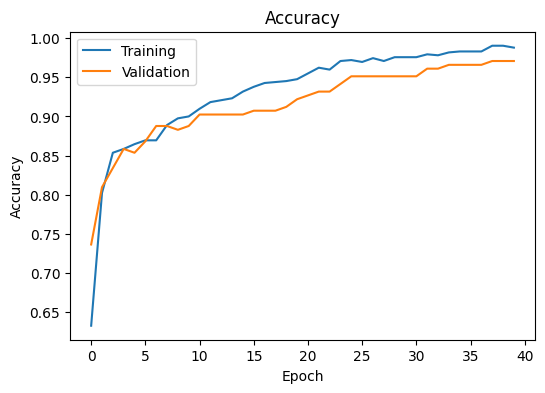

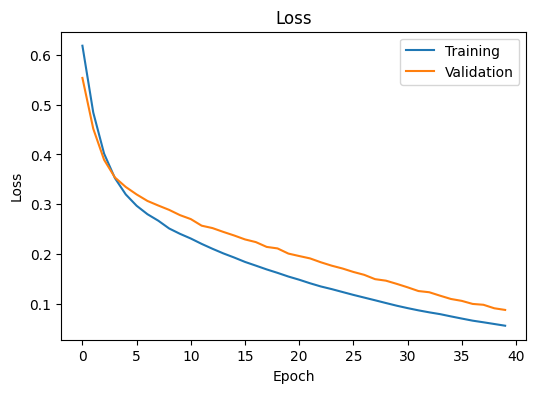

In [ ]:
#Grafici accuracy e loss
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


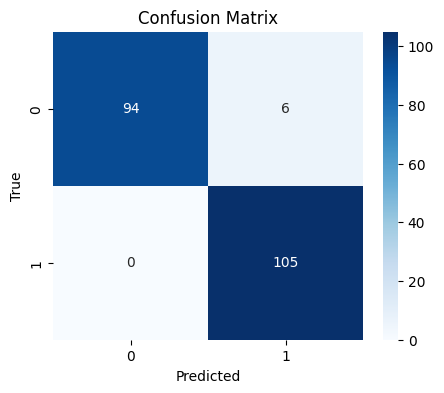

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       100
           1       0.95      1.00      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

AUC: 0.9987


In [ ]:
#Matrice di confusione e loss
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")


In [ ]:
# Conclusioni
La pipeline sviluppata mostra come un modello MLP relativamente semplice possa ottenere ottimi risultati nella predizione della malattia cardiaca a partire da dati tabulari. Dopo la fase di preprocessing (encoding, scaling, train-test split), l’addestramento ha prodotto metriche elevate e stabili, con:

Accuracy = 0.97

F1-score = 0.97

AUC = 0.9987

Le curve di loss e accuracy mostrano un apprendimento regolare, senza evidenza di overfitting: le prestazioni sul validation set rimangono molto vicine a quelle di training. La matrice di confusione conferma un buon equilibrio tra classi positive e negative, con pochissimi errori.

Questi risultati indicano che, su dataset clinici strutturati di dimensioni limitate, reti MLP leggere possono fornire prestazioni molto robuste.
